<a href="https://colab.research.google.com/github/RuishiCh-git/Open-Close-Eye-Detection/blob/main/OpenCloseEyesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 922.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image

In [ ]:
from google.colab import files
from IPython.display import display, Image
import cv2

In [ ]:
from PIL import Image

# Face & Eye Detection

In [ ]:
# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

# load model
model = YOLO(model_path)

# inference
image_path = "/content/drive/My Drive/Academics/EDUC463/Face/Closed/0.jpg"
output = model(Image.open(image_path))
results = Detections.from_ultralytics(output[0])

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


model.pt:   0%|          | 0.00/6.25M [00:00<?, ?B/s]


0: 640x640 1 FACE, 974.0ms
Speed: 36.2ms preprocess, 974.0ms inference, 24.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results

Detections(xyxy=array([[     27.478,      92.255,       124.2,      207.66]], dtype=float32), mask=None, confidence=array([    0.88808], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['FACE'], dtype='<U4')})

# Open & Close Eye Detection

## Read in Data

In [ ]:
drive_root = "/content/drive/My Drive/Academics/EDUC463/TrainingSet"
print(os.listdir(drive_root))

['.DS_Store', 'Opened', 'Closed']


In [ ]:
train_directory_path = "/content/drive/My Drive/Academics/EDUC463/TestSet"
test_directory_path = "/content/drive/My Drive/Academics/EDUC463/TrainingSet"
val_directory_path="/content/drive/My Drive/Academics/EDUC463/ImprovementSet"

In [ ]:
batch_size = 32
img_height = 160
img_width = 160
IMG_SIZE = (img_height, img_width)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory_path,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory_path,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4232 files belonging to 2 classes.
Found 1704 files belonging to 2 classes.
Found 4103 files belonging to 2 classes.


## Process Data

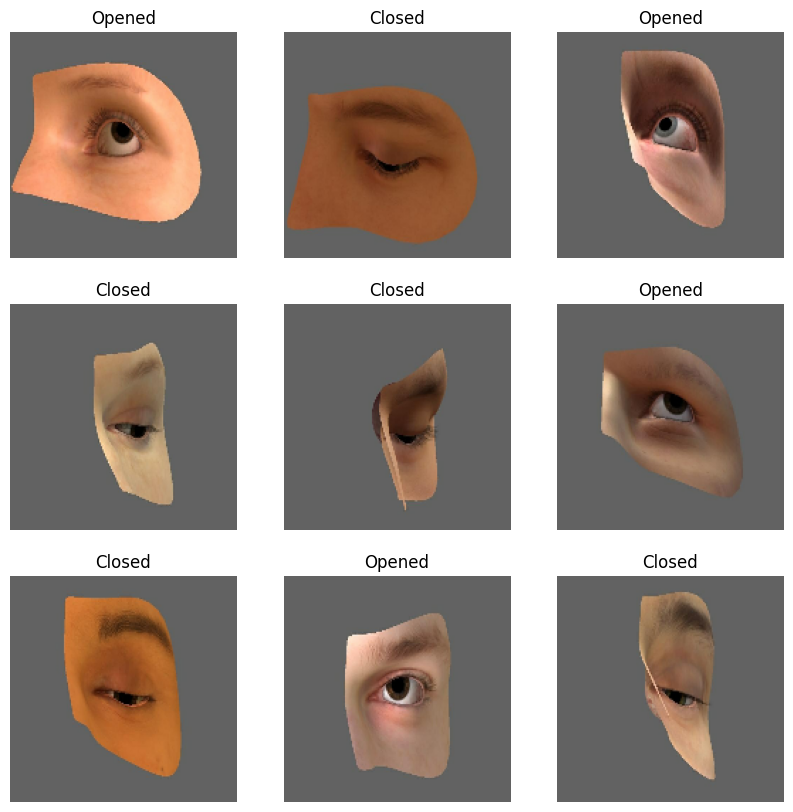

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 129
Number of test batches: 54


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


### Feature extraction

In [ ]:
base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

2

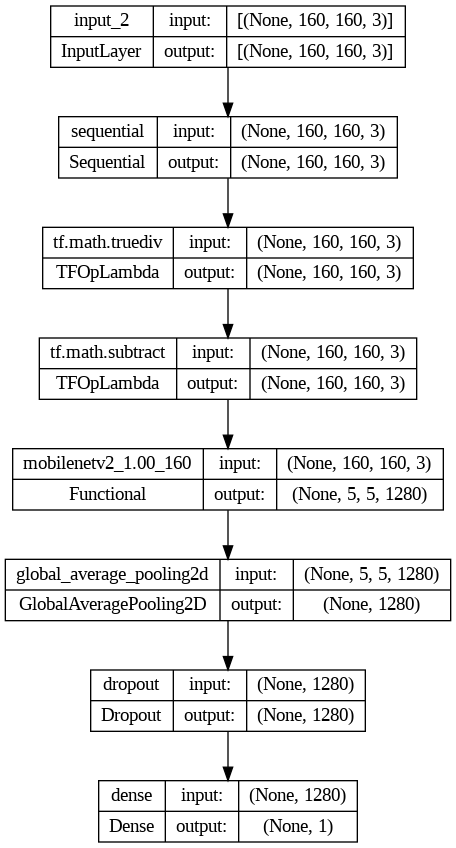

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Compile the Model

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

129/129 [==============================] - 494s 4s/step - loss: 0.8913 - accuracy: 0.5218


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.89
initial accuracy: 0.52


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
133/133 [==============================] - 358s 3s/step - loss: 0.7378 - accuracy: 0.5423 - val_loss: 0.5309 - val_accuracy: 0.7919
Epoch 2/10
133/133 [==============================] - 173s 1s/step - loss: 0.5337 - accuracy: 0.7427 - val_loss: 0.3935 - val_accuracy: 0.8791
Epoch 3/10
133/133 [==============================] - 174s 1s/step - loss: 0.4367 - accuracy: 0.8164 - val_loss: 0.3271 - val_accuracy: 0.8964
Epoch 4/10
133/133 [==============================] - 163s 1s/step - loss: 0.3714 - accuracy: 0.8615 - val_loss: 0.2847 - val_accuracy: 0.9071
Epoch 5/10
133/133 [==============================] - 170s 1s/step - loss: 0.3446 - accuracy: 0.8658 - val_loss: 0.2630 - val_accuracy: 0.9108
Epoch 6/10
133/133 [==============================] - 169s 1s/step - loss: 0.3065 - accuracy: 0.8861 - val_loss: 0.2450 - val_accuracy: 0.9169
Epoch 7/10
133/133 [==============================] - 169s 1s/step - loss: 0.2910 - accuracy: 0.8897 - val_loss: 0.2352 - val_accuracy: 0.9181

### Learning Curve

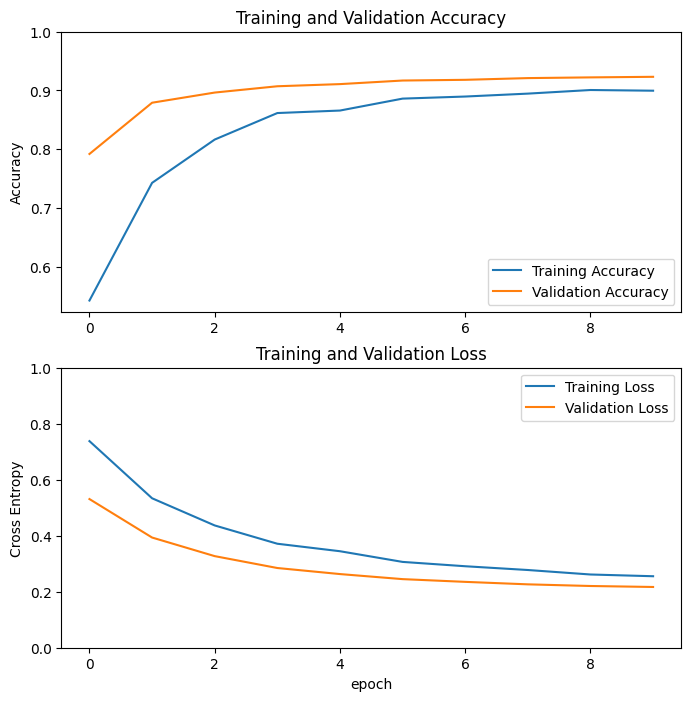

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 160, 160, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 160, 160, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)

56

### Continue Training

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
133/133 [==============================] - 209s 2s/step - loss: 0.1879 - accuracy: 0.9277 - val_loss: 0.1972 - val_accuracy: 0.9364
Epoch 11/20
133/133 [==============================] - 207s 2s/step - loss: 0.1527 - accuracy: 0.9412 - val_loss: 0.1904 - val_accuracy: 0.9383
Epoch 12/20
133/133 [==============================] - 209s 2s/step - loss: 0.1358 - accuracy: 0.9506 - val_loss: 0.2571 - val_accuracy: 0.9225
Epoch 13/20
133/133 [==============================] - 195s 1s/step - loss: 0.1270 - accuracy: 0.9532 - val_loss: 0.1430 - val_accuracy: 0.9515
Epoch 14/20
133/133 [==============================] - 206s 2s/step - loss: 0.1212 - accuracy: 0.9579 - val_loss: 0.1383 - val_accuracy: 0.9534
Epoch 15/20
133/133 [==============================] - 196s 1s/step - loss: 0.1132 - accuracy: 0.9601 - val_loss: 0.2351 - val_accuracy: 0.9286
Epoch 16/20
133/133 [==============================] - 208s 2s/step - loss: 0.1135 - accuracy: 0.9560 - val_loss: 0.1737 - val_accuracy:

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluation and Prediction

In [42]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

54/54 [==============================] - 53s 907ms/step - loss: 0.1568 - accuracy: 0.9531
Test accuracy : 0.9530516266822815


Predictions:
 [1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1]
Labels:
 [1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1]


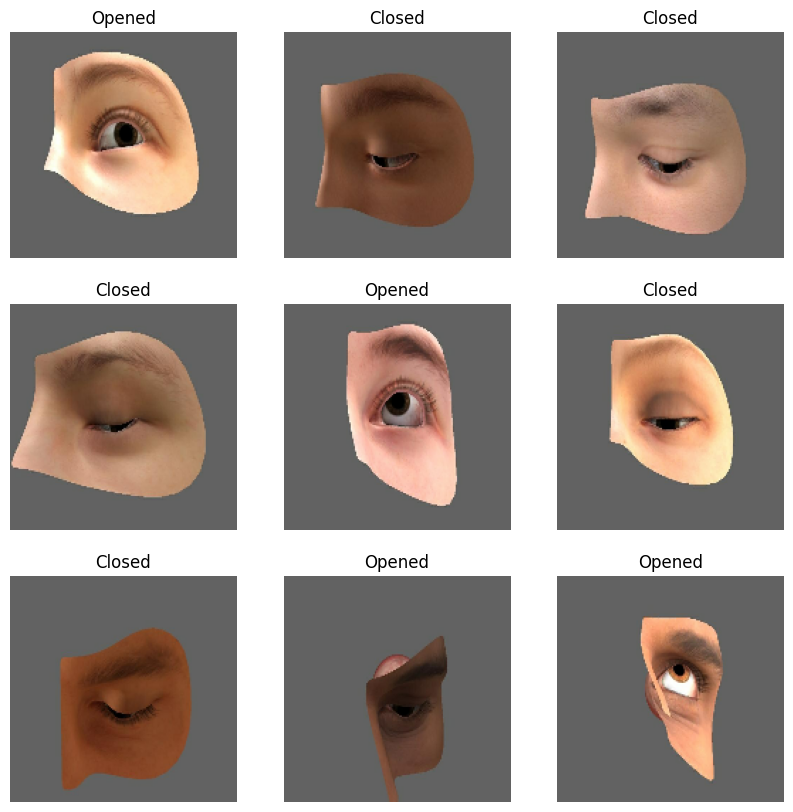

In [43]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")